# Nettoyage et Visualisation des données

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, model_selection

In [32]:
pumpkins = pd.read_csv('../data/US-pumpkins.csv')
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
# pumpkins.describe()
pumpkins

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
70,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,15.00,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
71,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,18.00,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
72,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,18.00,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
73,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,17.00,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
74,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/8/16,15.00,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,15.00,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1739,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,13.75,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1740,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,10.75,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1741,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,12.00,12.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.


Vérifiez s'il manque des données

In [33]:
pumpkins.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [34]:
new_columns = ['City Name', 'Package', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

In [35]:
pumpkins

,City Name,Package,Date,Low Price,High Price
70,BALTIMORE,1 1/9 bushel cartons,9/24/16,15.00,15.0
71,BALTIMORE,1 1/9 bushel cartons,9/24/16,18.00,18.0
72,BALTIMORE,1 1/9 bushel cartons,10/1/16,18.00,18.0
73,BALTIMORE,1 1/9 bushel cartons,10/1/16,17.00,17.0
74,BALTIMORE,1 1/9 bushel cartons,10/8/16,15.00,15.0
...,...,...,...,...,...
1738,ST. LOUIS,1/2 bushel cartons,9/30/16,15.00,15.0
1739,ST. LOUIS,1/2 bushel cartons,9/30/16,13.75,15.0
1740,ST. LOUIS,1/2 bushel cartons,9/30/16,10.75,15.0
1741,ST. LOUIS,1/2 bushel cartons,9/30/16,12.00,12.0


In [36]:
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2
price

70      15.000
71      18.000
72      18.000
73      17.000
74      15.000
         ...  
1738    15.000
1739    14.375
1740    12.875
1741    12.000
1742    12.000
Length: 415, dtype: float64

In [37]:
month = pd.DatetimeIndex(pumpkins['Date']).month

In [47]:
new_pumpkins = pd.DataFrame({'Month': month, 'City Name':pumpkins['City Name'], 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

new_pumpkins

,Month,City Name,Package,Low Price,High Price,Price
70,9,BALTIMORE,1 1/9 bushel cartons,15.00,15.0,13.50
71,9,BALTIMORE,1 1/9 bushel cartons,18.00,18.0,16.20
72,10,BALTIMORE,1 1/9 bushel cartons,18.00,18.0,16.20
73,10,BALTIMORE,1 1/9 bushel cartons,17.00,17.0,15.30
74,10,BALTIMORE,1 1/9 bushel cartons,15.00,15.0,13.50
...,...,...,...,...,...,...
1738,9,ST. LOUIS,1/2 bushel cartons,15.00,15.0,30.00
1739,9,ST. LOUIS,1/2 bushel cartons,13.75,15.0,28.75
1740,9,ST. LOUIS,1/2 bushel cartons,10.75,15.0,25.75
1741,9,ST. LOUIS,1/2 bushel cartons,12.00,12.0,24.00


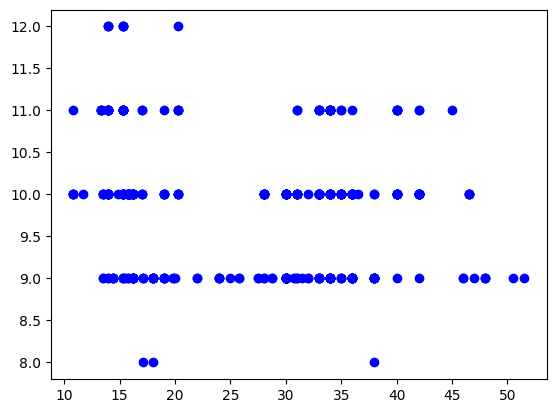

In [51]:
price = new_pumpkins.Price
month = new_pumpkins.Month
plt.plot(price, month, 'bo')
plt.show()

Text(0, 0.5, 'Pumpkin Price')

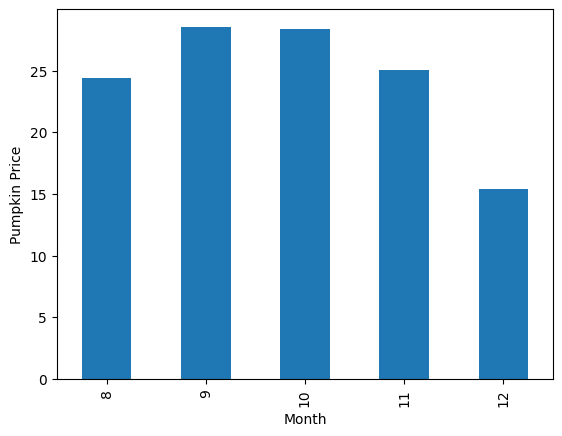

In [65]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")

<AxesSubplot: >

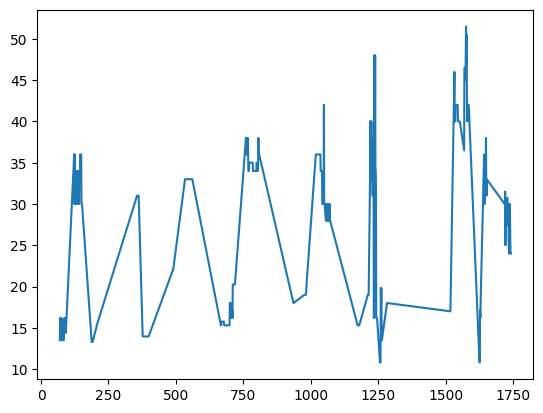

In [61]:
new_pumpkins['Price'].plot()